# **Fraudulent transaction detection using Logistic Regression**

In [0]:
# Importing all the required Libraries

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import random
import csv

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## **Data pre-processing**

In [0]:
# Reading train_transaction.csv file
df_train_trans = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/train_transaction.csv', low_memory=False) 
df_train_trans = df_train_trans.sample(frac=1).reset_index(drop=True)

# Reading train_identity.csv file
df_train_id = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/train_identity.csv', low_memory=False)
df_train_id = df_train_id.sample(frac=1).reset_index(drop=True)

# Reading test_transaction.csv file
df_test_trans = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/test_transaction.csv', low_memory=False) 
df_test_trans = df_test_trans.sample(frac=1).reset_index(drop=True)

# Reading test_identity.csv file
df_test_id = pd.read_csv('/content/drive/My Drive/ieee-fraud-detection/test_identity.csv', low_memory=False)
df_test_id = df_test_id.sample(frac=1).reset_index(drop=True)

In [4]:
print(df_train_trans.shape)

(590540, 394)


In [5]:
print(df_train_id.shape)

(144233, 41)


In [0]:
# Merging train_transaction & train_identity using the common column (feature) 'TransactionID'

df_train = df_train_trans.merge(df_train_id, on="TransactionID", how='left')

In [7]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3423716,0,11046442,107.95,W,3301,555.0,150.0,visa,226.0,debit,387.0,87.0,12.0,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3193495,0,4745291,10.99,W,17188,321.0,150.0,visa,226.0,debit,299.0,87.0,NaN,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3250381,0,6363628,47.95,W,11556,309.0,150.0,visa,226.0,debit,181.0,87.0,NaN,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,4.0,0.0,0.0,4.0,0.0,5.0,0.0,23.0,6.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3432407,0,11322776,77.00,W,14084,257.0,150.0,visa,226.0,debit,327.0,87.0,196.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3467419,0,12492735,107.95,W,17363,111.0,150.0,visa,226.0,debit,498.0,87.0,11.0,NaN,gmail.com,NaN,1.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,26.0,1.0,206.0,206.0,2.0,81.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# After merging

print(df_train.shape)

(590540, 434)


In [9]:
print(df_test_trans.shape)

(506691, 393)


In [10]:
print(df_test_id.shape)

(141907, 41)


In [0]:
# Merging test_transaction & test_identity using the common column (feature) 'TransactionID'

df_test = df_test_trans.merge(df_test_id, on="TransactionID", how='left')

In [12]:
df_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3832323,24242493,75.00,R,13481,445.0,150.0,mastercard,224.0,debit,330.0,87.0,NaN,NaN,hotmail.com,comcast.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,-5.0,403333.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,NaN,410.0,533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10_13_6,safari 11.0,24.0,1280x800,match_status:2,T,F,T,F,desktop,MacOS
1,3789748,22729262,16.95,W,12634,555.0,150.0,visa,226.0,debit,203.0,87.0,17.0,NaN,yahoo.com,NaN,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,9.0,9.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4132108,33428398,50.00,R,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,NaN,NaN,live.com,live.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,-5.0,106723.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-480.0,New,NotFound,166.0,NaN,286.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 12.1.0,mobile safari 12.0,32.0,2208x1242,match_status:2,T,F,F,F,mobile,iOS Device
3,3827817,24085730,161.00,W,1546,111.0,150.0,visa,226.0,debit,204.0,87.0,7.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4137951,33526596,50.00,R,16659,170.0,150.0,visa,226.0,credit,299.0,87.0,NaN,NaN,anonymous.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,-5.0,102508.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-480.0,New,NotFound,166.0,18.0,529.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10_13_6,safari 11.0,24.0,2560x1440,match_status:2,T,F,F,F,desktop,MacOS


In [13]:
# After merging

print(df_test.shape)

(506691, 433)


In [14]:
# Percentage of fraudulent transactions

print(len(df_train[df_train['isFraud']== 1]))
per_fraud = len(df_train[df_train['isFraud'] == 1])/len(df_train) * 100
print(per_fraud)

20663
3.4990009144173126


## **Visualizing the data**

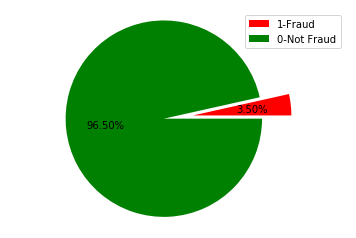

In [15]:
# Initializing Pie Chart for visualizing the above data

labels = '1-Fraud', '0-Not Fraud'
sizes = [len(df_train[df_train['isFraud'] == 1]), len(df_train[df_train['isFraud'] == 0])]
colors = ['red', 'green']
explode = (0.3, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Percentage of Missing Values')

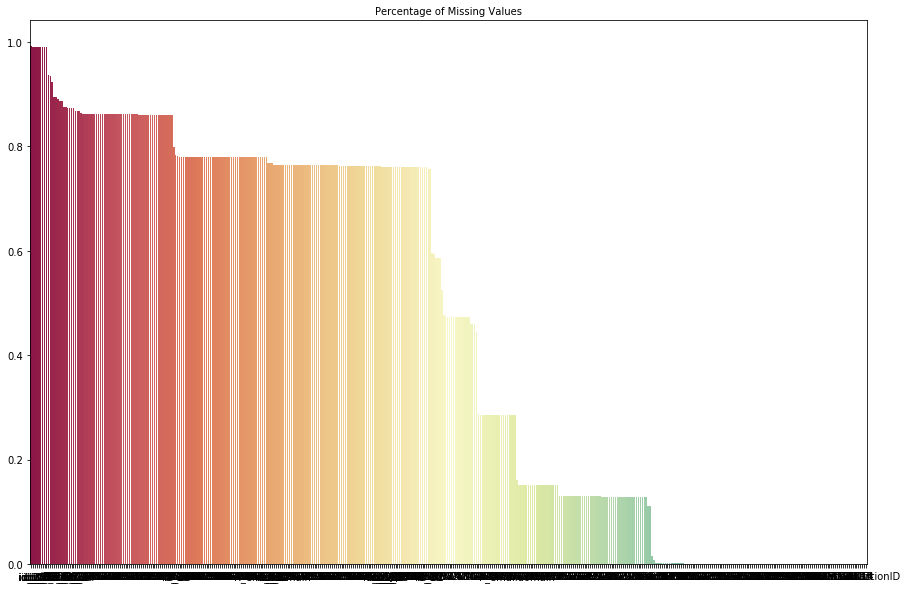

In [16]:
# Plotting the percentage of NA values for each feature in the training dataset using bar plot

figure(figsize=(15, 10))

sns.barplot(y=df_train.isnull().sum().sort_values(ascending=False)/len(df_train),
            x=df_train.isnull().sum().sort_values(ascending=False).index,
            palette = "Spectral")
title("Percentage of Missing Values", size=10)

## **Data Cleaning**

In [0]:
columns_def = pd.DataFrame({"NA_count":df_train.isnull().sum().sort_values(ascending=False)})
columns_def["Per"]=columns_def["NA_count"]/len(df_train)

In [18]:
# It is showing that the feature - 'id_24' - contains the most number of NaN values

columns_def.head(100)

,NA_count,Per
id_24,585793,0.991962
id_25,585408,0.991310
id_07,585385,0.991271
id_08,585385,0.991271
id_21,585381,0.991264
id_26,585377,0.991257
id_22,585371,0.991247
id_23,585371,0.991247
id_27,585371,0.991247
dist2,552913,0.936284


In [19]:
columns_def.tail(100)

,NA_count,Per
V315,1269,0.002149
V296,1269,0.002149
V300,1269,0.002149
V301,1269,0.002149
V281,1269,0.002149
V95,314,0.000532
V96,314,0.000532
V106,314,0.000532
V114,314,0.000532
V113,314,0.000532


In [0]:
# Cycle through various limit for percent NA per column
range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]

In [21]:
for i in range:
  print(columns_def[columns_def["Per"]<i].shape[0]/df_train.shape[1])

0.25806451612903225
0.41935483870967744
0.46543778801843316
0.46543778801843316
0.5069124423963134
0.5207373271889401
0.5207373271889401
0.5207373271889401
0.8294930875576036
0.9723502304147466


In [0]:
limit = 0.75

In [0]:
columns_final = columns_def[columns_def["Per"]<limit].index

In [24]:
df_train = df_train[df_train.columns.intersection(columns_final)]
df_train.shape

(590540, 226)

In [25]:
# Show categorical variables

new_cat = df_train[df_train.select_dtypes(include=['object']).columns]
new_cat_names = new_cat.select_dtypes(include=['object']).columns
new_cat_names

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')

In [0]:
def new_cat_func(df_train, new_cat_names):
  for i in new_cat_names:
    temp_cat_name = pd.get_dummies(df_train[i])
    df_train = pd.concat([df_train, temp_cat_name], axis=1)
  return (df_train)

In [0]:
df_train = new_cat_func(df_train, new_cat_names)

In [28]:
df_train.shape

(590540, 317)

In [29]:
df_train = df_train._get_numeric_data()
df_train = df_train.dropna()

len(df_train[df_train["isFraud"]==1])/len(df_train) * 100

2.0913289533597865

In [0]:
x_full = df_train.drop(["isFraud"], axis=1)
y_full = df_train["isFraud"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.20)

## **Training the model**

In [0]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)      

In [33]:
lr.score(X_test, y_test)

0.9795096963044274

In [0]:
y_pred = lr.predict(X_test)

In [35]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,24073,25,24098
1,479,20,499
All,24552,45,24597


In [36]:
recall_score(y_test, y_pred)

0.04008016032064128